In [902]:
import pandas as pd
import numpy as np
import datetime as td

In [903]:
cust=pd.read_csv("Customer.csv")

In [904]:
prod=pd.read_csv("prod_cat_info.csv")

In [905]:
trans=pd.read_csv('Transactions.csv')


In [906]:
def missing_replace(x):
    x[x=='']=np.nan
    return x

In [907]:

trans['tran_date']=pd.to_datetime(trans['tran_date'])

# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.

cust

In [908]:
cust.head(1)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0


In [909]:
cust.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [910]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [911]:
print(cust[cust["Gender"].isnull()])

    customer_Id         DOB Gender  city_code
24       267199  14-02-1970    NaN        2.0
87       271626  02-06-1970    NaN        6.0


In [912]:
cust=cust.apply(missing_replace)

In [913]:
cust['DOB']=pd.to_datetime(cust['DOB'])
cust.size

22588

In [914]:
cust.shape

(5647, 4)

prod

In [915]:
prod.head(1)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens


In [916]:
prod.isnull().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [917]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [918]:
prod.shape

(23, 4)

trans

In [919]:
trans.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop


In [920]:
trans.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [921]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 1.8+ MB


In [922]:
trans['tran_date']=pd.to_datetime(trans['tran_date'])
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 1.8+ MB


In [923]:
trans.shape

(23053, 10)

In [924]:
trans.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop


merge

In [925]:
#rename 
trans=trans.rename(columns={'cust_id':'customer_Id'})
trans.head(1)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop


In [926]:
trans.shape

(23053, 10)

In [927]:
cust.shape

(5647, 4)

In [928]:
#merge cust and trans
cust_trans=pd.merge(cust,trans,left_on='customer_Id',right_on='customer_Id',how='left')
cust_trans.shape

(23194, 13)

In [929]:
cust_trans.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop
1,268408,1970-02-01,M,4.0,1.619787e+10,2013-12-16,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store


In [930]:
prod.head(1)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens


In [931]:
prod.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)
prod.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [932]:
cust_trans.shape

(23194, 13)

In [933]:
prod.shape

(23, 4)

In [934]:
#merge cust_trans and prod
Customer_Final=pd.merge(cust_trans,prod,on=['prod_subcat_code','prod_subcat_code','prod_cat_code','prod_cat_code'],how='inner')
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,7.310943e+10,2011-03-25,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,Fiction


In [935]:
Customer_Final.shape

(23053, 15)

In [936]:
Customer_Final.isnull().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [937]:
Customer_Final.apply(missing_replace)
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,7.310943e+10,2011-03-25,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,Fiction


In [938]:
Customer_Final.duplicated().sum()

13

In [939]:
Customer_Final.drop_duplicates(inplace=True)

# 2. Prepare a summary report for the merged data set.


In [940]:
#a. Get the column names and their corresponding data types
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_Id       23040 non-null  int64         
 1   DOB               23040 non-null  datetime64[ns]
 2   Gender            23031 non-null  object        
 3   city_code         23032 non-null  float64       
 4   transaction_id    23040 non-null  float64       
 5   tran_date         23040 non-null  datetime64[ns]
 6   prod_subcat_code  23040 non-null  float64       
 7   prod_cat_code     23040 non-null  float64       
 8   Qty               23040 non-null  float64       
 9   Rate              23040 non-null  float64       
 10  Tax               23040 non-null  float64       
 11  total_amt         23040 non-null  float64       
 12  Store_type        23040 non-null  object        
 13  prod_cat          23040 non-null  object        
 14  prod_subcat       2304

In [941]:
#b(i).Top 10 observations;
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,7.310943e+10,2011-03-25,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,6.477727e+10,2011-05-23,7.0,5.0,2.0,197.0,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,8.717434e+10,2013-09-12,7.0,5.0,4.0,1141.0,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,7.624274e+10,2013-05-23,7.0,5.0,4.0,1020.0,428.400,4508.400,e-Shop,Books,Fiction
5,274630,1970-01-02,M,4.0,7.835735e+10,2012-11-04,7.0,5.0,1.0,646.0,67.830,713.830,TeleShop,Books,Fiction
6,273541,1970-01-02,M,4.0,2.391682e+10,2013-09-02,7.0,5.0,4.0,410.0,172.200,1812.200,e-Shop,Books,Fiction
7,269008,1970-02-13,F,6.0,3.556057e+10,2013-09-03,7.0,5.0,1.0,1441.0,151.305,1592.305,e-Shop,Books,Fiction
8,269008,1970-02-13,F,6.0,9.403331e+10,2012-04-26,7.0,5.0,5.0,746.0,391.650,4121.650,MBR,Books,Fiction
9,267199,1970-02-14,NaN,2.0,5.674926e+10,2012-11-01,7.0,5.0,4.0,1049.0,440.580,4636.580,MBR,Books,Fiction


In [942]:
#b(ii).Bottom 10 observations

In [943]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,268914,1992-11-15,F,3.0,1.407824e+09,2011-10-06,10.0,5.0,1.0,1252.0,131.460,1383.460,MBR,Books,Non-Fiction
23044,269519,1992-11-17,M,9.0,2.971950e+10,2013-12-24,10.0,5.0,4.0,1036.0,435.120,4579.120,TeleShop,Books,Non-Fiction
23045,273524,1992-11-25,F,1.0,2.576281e+10,2012-11-19,10.0,5.0,1.0,1401.0,147.105,1548.105,Flagship store,Books,Non-Fiction
23046,272141,1992-02-12,F,10.0,7.133709e+10,2012-07-22,10.0,5.0,-3.0,-1422.0,447.930,-4713.930,e-Shop,Books,Non-Fiction
23047,272141,1992-02-12,F,10.0,7.133709e+10,2012-07-16,10.0,5.0,3.0,1422.0,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,1992-04-12,F,1.0,6.354038e+10,2012-10-10,10.0,5.0,3.0,224.0,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,1992-09-12,F,7.0,7.179320e+10,2013-08-17,10.0,5.0,4.0,691.0,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,9.121711e+10,2012-01-02,10.0,5.0,2.0,411.0,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,1992-12-15,F,7.0,9.011448e+10,2011-01-31,10.0,5.0,-4.0,-1408.0,591.360,-6223.360,e-Shop,Books,Non-Fiction
23052,268097,1992-12-15,F,7.0,9.011448e+10,2011-01-26,10.0,5.0,4.0,1408.0,591.360,6223.360,e-Shop,Books,Non-Fiction


In [944]:
#c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
 
Cust_summ_n=Customer_Final.describe(include=[np.number])
Cust_summ_n.tail()

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
min,266783.00,1.0,3.268991e+06,1.0,1.0,-5.0,-1499.0,7.3500,-8270.925
25%,268935.00,3.0,2.493315e+10,3.0,2.0,1.0,312.0,98.2800,762.450
50%,270980.50,5.0,5.009188e+10,5.0,4.0,3.0,710.0,199.0800,1756.950
75%,273114.25,8.0,7.532632e+10,10.0,5.0,4.0,1109.0,365.7675,3570.255
max,275265.00,10.0,9.998755e+10,12.0,6.0,5.0,1500.0,787.5000,8287.500


In [945]:
#d. Frequency tables for all the categorical variables
Cust_summ_o=Customer_Final.describe(include=[np.object])
Cust_summ_o

<ipython-input-945-83649ab51100>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Cust_summ_o=Customer_Final.describe(include=[np.object])


,Gender,Store_type,prod_cat,prod_subcat
count,23031,23040,23040,23040
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11804,9304,6066,3046


In [946]:
Customer_Final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction


# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [947]:
import matplotlib as mp
import matplotlib.pyplot as plt

In [948]:
#continuous variables.
cont_cust=Customer_Final.loc[:,["Qty","Rate","Tax","total_amt"]]
lambda x: x 

<function __main__.<lambda>(x)>

Text(0.5, 1.0, 'Qty')

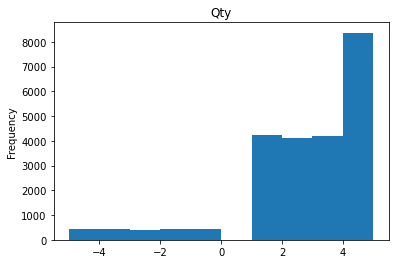

In [949]:
cont_cust.Qty.plot.hist()
plt.title('Qty')

Text(0.5, 1.0, 'Rate')

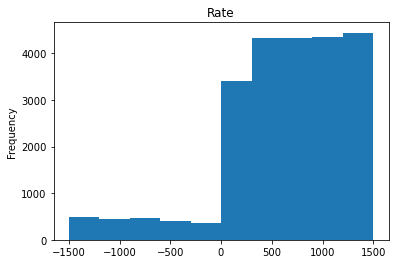

In [950]:
cont_cust.Rate.plot.hist()
plt.title('Rate')

Text(0.5, 1.0, 'Tax')

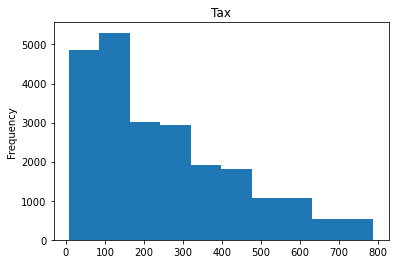

In [951]:
cont_cust.Tax.plot.hist()
plt.title('Tax')

Text(0.5, 1.0, 'total_amt')

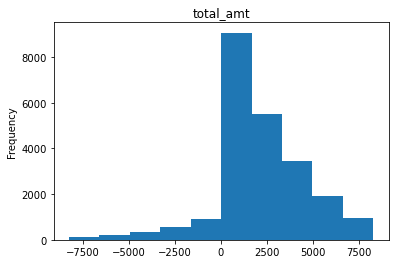

In [952]:
cont_cust.total_amt.plot.hist()
plt.title('total_amt')

In [953]:
import seaborn as sns  
#categorical variables.
cate_cust=Customer_Final.loc[:,Customer_Final.dtypes=='object']

In [954]:
cate_cust.head()

,Gender,Store_type,prod_cat,prod_subcat
0,M,TeleShop,Books,Fiction
1,M,e-Shop,Books,Fiction
2,F,Flagship store,Books,Fiction
3,F,e-Shop,Books,Fiction
4,F,e-Shop,Books,Fiction


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

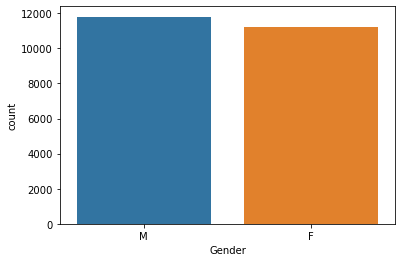

In [955]:
sns.countplot(cate_cust['Gender'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store_type', ylabel='count'>

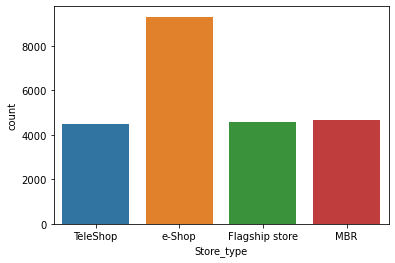

In [956]:
sns.countplot(cate_cust['Store_type'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_cat', ylabel='count'>

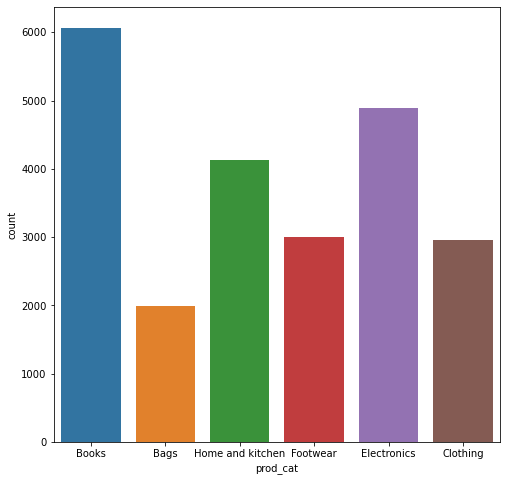

In [957]:
plt.figure(figsize=(8,8))
sns.countplot(cate_cust['prod_cat'])


<AxesSubplot:ylabel='prod_subcat'>

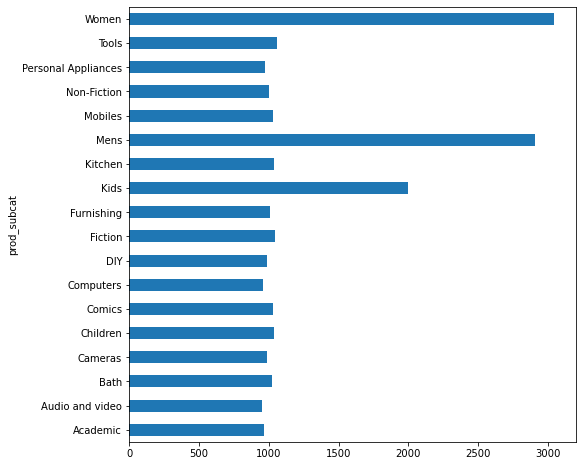

In [958]:
plt.figure(figsize=(8,8))
cate_cust.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')

# 4. Calculate the following information using the merged dataset :

In [959]:
#a. Time period of the available transaction data
total_days=Customer_Final.tran_date.max()-Customer_Final.tran_date.min()

In [960]:
start_date=Customer_Final.tran_date.min()
end_date=Customer_Final.tran_date.max()

In [961]:
print('Total',total_days ,'time period of available data','from', pd.Timestamp.strftime(start_date,format="%d-%m-%Y"),'to',pd.Timestamp.strftime(end_date,format="%d-%m-%Y"))

Total 1430 days 00:00:00 time period of available data from 02-01-2011 to 02-12-2014


In [962]:
#b. Count of transactions where the total amount of transaction was negative

In [963]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,7.310943e+10,2011-03-25,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,Fiction


In [964]:
Customer_Final.loc[Customer_Final["total_amt"]<0,'transaction_id'].count()

2164

# 5. Analyze which product categories are more popular among females vs male customers

In [965]:
Customer_Final.prod_cat.describe()

count     23040
unique        6
top       Books
freq       6066
Name: prod_cat, dtype: object

In [966]:
Gender_popular=Customer_Final.groupby(['Gender','prod_cat'])[['Qty']].sum() 

In [967]:
Gender_popular1=Gender_popular.reset_index()
Gender_popular1

,Gender,prod_cat,Qty
0,F,Bags,2364.0
1,F,Books,7080.0
2,F,Clothing,3425.0
3,F,Electronics,5832.0
4,F,Footwear,3721.0
5,F,Home and kitchen,4898.0
6,M,Bags,2346.0
7,M,Books,7587.0
8,M,Clothing,3748.0
9,M,Electronics,6486.0


In [968]:
GM=Gender_popular1 ["Gender"].isin(["M"])
GF=Gender_popular1 ["Gender"].isin(["F"])

In [969]:
M=Gender_popular1[GM]
F=Gender_popular1[GF]

In [970]:
F=F.reindex()
M=M.reindex()

In [971]:
F 


,Gender,prod_cat,Qty
0,F,Bags,2364.0
1,F,Books,7080.0
2,F,Clothing,3425.0
3,F,Electronics,5832.0
4,F,Footwear,3721.0
5,F,Home and kitchen,4898.0


#### product categories are more popular among females

In [972]:
F[F.Qty.values>M.Qty.values]

,Gender,prod_cat,Qty
0,F,Bags,2364.0
4,F,Footwear,3721.0


#### product categories are more popular among males

In [973]:
M[F.Qty.values<M.Qty.values]

,Gender,prod_cat,Qty
7,M,Books,7587.0
8,M,Clothing,3748.0
9,M,Electronics,6486.0
11,M,Home and kitchen,5051.0


# 6. Which City code has the maximum customers and what was the percentage of customers from
that city?

In [974]:
Cust_city=Customer_Final.groupby('city_code')[['customer_Id']].count()

In [975]:
Cust_cityAsc=Cust_city.sort_values(by=['customer_Id'],ascending=False).reset_index()

In [976]:
Cust_cityAsc

,city_code,customer_Id
0,4.0,2422
1,3.0,2410
2,5.0,2357
3,7.0,2356
4,10.0,2333
5,8.0,2328
6,2.0,2268
7,1.0,2255
8,9.0,2176
9,6.0,2127


In [977]:
TotalCust_city=Cust_city.customer_Id.sum()
TotalCust_city

23032

In [978]:

Cust_cityAsc.iloc[0,1:]

customer_Id    2422.0
Name: 0, dtype: float64

In [979]:
per=round((Cust_cityAsc.customer_Id[0] / TotalCust_city) * 100,2)

In [980]:
print(per,'%','from City_Code:',Cust_cityAsc.city_code[0],'total Customer:',Cust_cityAsc.iloc[0,1:])

10.52 % from City_Code: 4.0 total Customer: customer_Id    2422.0
Name: 0, dtype: float64


# 7. Which store type sells the maximum products by value and by quantity?

In [981]:
Customer_Final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction


In [982]:
max_sell=Customer_Final.groupby('Store_type')['Qty','Rate'].sum()

<ipython-input-982-4fa5f03b971a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  max_sell=Customer_Final.groupby('Store_type')['Qty','Rate'].sum()


In [983]:
max_sell=max_sell.sort_values(by=['Qty','Rate'],ascending=False)

In [984]:
max_sell.head(1)

,Qty,Rate
Store_type,,
e-Shop,22790.0,5945770.0


# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?

In [985]:
Customer_Final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction


In [986]:
Earned_store=Customer_Final.groupby(['Store_type','prod_cat'])[['total_amt']].sum().reset_index()

In [987]:
Earned_store.head(8)

,Store_type,prod_cat,total_amt
0,Flagship store,Bags,870548.835
1,Flagship store,Books,2493677.810
2,Flagship store,Clothing,1194423.230
3,Flagship store,Electronics,2215136.040
4,Flagship store,Footwear,1234806.560
5,Flagship store,Home and kitchen,1713004.150
6,MBR,Bags,848678.675
7,MBR,Books,2496039.195


In [988]:
Flagship_store=Earned_store['Store_type'].isin(['Flagship store'])

In [989]:
Flagship_store=Earned_store[Flagship_store]
Flagship_store

,Store_type,prod_cat,total_amt
0,Flagship store,Bags,870548.835
1,Flagship store,Books,2493677.810
2,Flagship store,Clothing,1194423.230
3,Flagship store,Electronics,2215136.040
4,Flagship store,Footwear,1234806.560
5,Flagship store,Home and kitchen,1713004.150


In [990]:
E=Flagship_store['prod_cat'].isin(['Electronics'])
C=Flagship_store['prod_cat'].isin(['Clothing'])

In [991]:
Electronics_cat=Flagship_store[E]
Clothing_cat=Flagship_store[C]
CC=Clothing_cat.total_amt.sum()
EE=Electronics_cat.total_amt.sum()
CC

1194423.2299999988

In [992]:
print('total amount of both Clothing :' ,CC ,'and Electronics :' ,EE, 'total amount earned from ' ,'Flagship Store:',Clothing_cat.total_amt.sum() + Electronics_cat.total_amt.sum())

total amount of both Clothing : 1194423.2299999988 and Electronics : 2215136.0400000038 total amount earned from  Flagship Store: 3409559.2700000023


# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [993]:
Male_Ele=Customer_Final.groupby(['Gender','prod_cat'])[['total_amt']].sum().reset_index()

In [994]:
Male_Ele

,Gender,prod_cat,total_amt
0,F,Bags,2079618.840
1,F,Books,6174590.825
2,F,Clothing,3026750.805
3,F,Electronics,5019354.210
4,F,Footwear,3203155.215
5,F,Home and kitchen,4133702.235
6,M,Bags,2046722.990
7,M,Books,6645972.775
8,M,Clothing,3224079.495
9,M,Electronics,5711351.620


In [995]:
print('total amount earned from "Male" customers under the "Electronics" category:',Male_Ele.total_amt[9])

total amount earned from "Male" customers under the "Electronics" category: 5711351.620000006


# 10. How many customers have more than 10 unique transactions, after removing all transactions
which have any negative amounts?

In [996]:
posi_tran=Customer_Final.loc[Customer_Final['total_amt']>0]

In [997]:
posi_tran.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,7.310943e+10,2011-03-25,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,Fiction


In [998]:
tran_uni=posi_tran.groupby(['customer_Id','prod_cat','prod_subcat'])[['transaction_id']].count().reset_index()

In [999]:
tran_uni_count=tran_uni.groupby('customer_Id')['transaction_id'].count().reset_index()

In [1000]:
tran_uni_count[tran_uni_count['transaction_id'] > 10]

,customer_Id,transaction_id


In [1001]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,7.310943e+10,2011-03-25,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,6.477727e+10,2011-05-23,7.0,5.0,2.0,197.0,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,8.717434e+10,2013-09-12,7.0,5.0,4.0,1141.0,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,7.624274e+10,2013-05-23,7.0,5.0,4.0,1020.0,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,6.354038e+10,2012-10-10,10.0,5.0,3.0,224.0,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,1992-09-12,F,7.0,7.179320e+10,2013-08-17,10.0,5.0,4.0,691.0,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,9.121711e+10,2012-01-02,10.0,5.0,2.0,411.0,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,1992-12-15,F,7.0,9.011448e+10,2011-01-31,10.0,5.0,-4.0,-1408.0,591.360,-6223.360,e-Shop,Books,Non-Fiction


# 11. For all customers aged between 25 - 35, find out:



In [1002]:
Customer_Final['Year']=pd.DatetimeIndex(Customer_Final['DOB']).year

In [1003]:
C_Y=td.date.today().year
C_Y

2022

In [1004]:
Customer_Final['Age']=C_Y-Customer_Final.Year

In [1005]:
Customer_Final11=Customer_Final.loc[25<Customer_Final['Age']]
Customer_Final11=Customer_Final11.loc[Customer_Final['Age']>35]

In [1006]:
Customer_Final11.head(5)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Year,Age
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction,1970,52
1,275152,1970-01-16,M,4.0,7.310943e+10,2011-03-25,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,Fiction,1970,52
2,275034,1970-01-18,F,4.0,6.477727e+10,2011-05-23,7.0,5.0,2.0,197.0,41.370,435.370,Flagship store,Books,Fiction,1970,52
3,270829,1970-01-22,F,8.0,8.717434e+10,2013-09-12,7.0,5.0,4.0,1141.0,479.220,5043.220,e-Shop,Books,Fiction,1970,52
4,267657,1970-01-29,F,7.0,7.624274e+10,2013-05-23,7.0,5.0,4.0,1020.0,428.400,4508.400,e-Shop,Books,Fiction,1970,52


# a. What was the total amount spent for “Electronics” and “Books” product categories?

In [1007]:
Cust_final_11a=Customer_Final11.groupby(['prod_cat'])[['total_amt']].sum()
Cust_final_11a

,total_amt
prod_cat,
Bags,3074490.120
Books,9658509.965
Clothing,4436005.925
Electronics,7846329.855
Footwear,4491147.635
Home and kitchen,6144496.150


In [1008]:
Ele_Boo=Cust_final_11a.sort_values(by='total_amt',ascending=False).head(2)

In [1009]:
Ele_Boo

,total_amt
prod_cat,
Books,9658509.965
Electronics,7846329.855


# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [1010]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Year,Age
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction,1970,52
1,275152,1970-01-16,M,4.0,7.310943e+10,2011-03-25,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,Fiction,1970,52
2,275034,1970-01-18,F,4.0,6.477727e+10,2011-05-23,7.0,5.0,2.0,197.0,41.370,435.370,Flagship store,Books,Fiction,1970,52
3,270829,1970-01-22,F,8.0,8.717434e+10,2013-09-12,7.0,5.0,4.0,1141.0,479.220,5043.220,e-Shop,Books,Fiction,1970,52
4,267657,1970-01-29,F,7.0,7.624274e+10,2013-05-23,7.0,5.0,4.0,1020.0,428.400,4508.400,e-Shop,Books,Fiction,1970,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,6.354038e+10,2012-10-10,10.0,5.0,3.0,224.0,70.560,742.560,TeleShop,Books,Non-Fiction,1992,30
23049,274618,1992-09-12,F,7.0,7.179320e+10,2013-08-17,10.0,5.0,4.0,691.0,290.220,3054.220,Flagship store,Books,Non-Fiction,1992,30
23050,268097,1992-12-15,F,7.0,9.121711e+10,2012-01-02,10.0,5.0,2.0,411.0,86.310,908.310,e-Shop,Books,Non-Fiction,1992,30
23051,268097,1992-12-15,F,7.0,9.011448e+10,2011-01-31,10.0,5.0,-4.0,-1408.0,591.360,-6223.360,e-Shop,Books,Non-Fiction,1992,30


In [1011]:
total_amount=Customer_Final[(Customer_Final['tran_date'] >='2014-01-01')&(Customer_Final['tran_date'] >='2014-03-01')]

In [1012]:
total_amount['total_amt'].sum()

869370.905